In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pickle

def get_test_generator():
    data_datagen = ImageDataGenerator(rescale=1.0 / 255)
    return data_datagen.flow_from_directory(
        "./savedimage/", 
        target_size=(244, 244), 
        batch_size=int(1)
    )


test_generator = get_test_generator()
image = test_generator.next()[0][0]
image = image[None, ...]
from apps.Xray import Xray
prediction = Xray().predict(image.tolist())
pred = tf.argmax(prediction, axis=1)
with open("./models/labels.pickle", "rb") as handle:
    idx_to_class1 = pickle.load(handle)

idx_to_class = {value: key for key, value in idx_to_class1.items()}
label = idx_to_class[pred.numpy()[0]]
result = label.split(".")[-1].replace("_", " ")
print(result)

INFO:root:Load model here...
INFO:root:Not loaded yet.
2023-06-26 15:07:56.947995: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-26 15:07:57.000500: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-26 15:07:57.001284: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-26 15:07:57.002895: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations,

In [ ]:
def get_train_generator():
    """Get the Train Path"""
    data_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        width_shift_range=0.2,
        height_shift_range=0.2,
        brightness_range=[0.5, 1.5],
        horizontal_flip=True,
    )
    return data_datagen.flow_from_directory(
        "Cardiomegaly_detection_dataset/train/",
        target_size=(244, 244),
        batch_size=32,
    )
train_generator = get_train_generator()
labels = train_generator.class_indices
with open("./models/Cardiomegaly_label.pickle", "wb") as handle:
        pickle.dump(labels, handle)


2023-07-02 12:08:36.670543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-02 12:08:36.724532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-02 12:08:36.724720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-02 12:08:36.726029: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 40 images belonging to 2 classes.


2023-07-02 12:08:46.206025: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-07-02 12:08:48.134469: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204


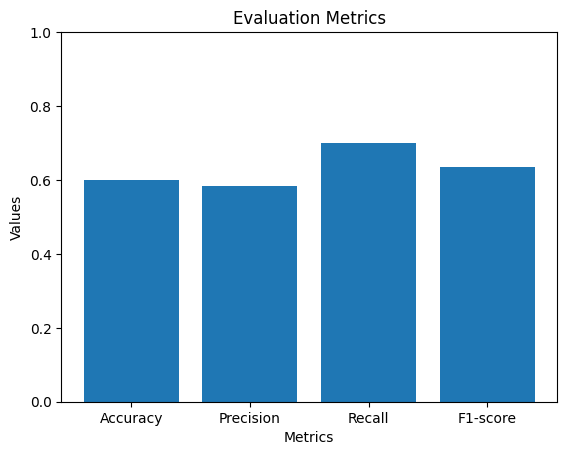

In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the function to load test data and labels
def get_test_data(test_data_dir):
    """Load test data and labels"""
    # Set the image dimensions and batch size
    IMG_SIZE = 244
    BATCH_SIZE = 32

    # Create ImageDataGenerator for test data
    data_generator = ImageDataGenerator(
        rescale=1.0 / 255,
        width_shift_range=0.2,
        height_shift_range=0.2,
        brightness_range=[0.5, 1.5],
        horizontal_flip=True,
    )

    # Get the test data generator
    test_generator = data_generator.flow_from_directory(
        test_data_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )

    # Get the true labels from the test generator
    true_labels = test_generator.classes

    return test_generator, true_labels


# Load the saved model
model = tf.keras.models.load_model('./models/Cardiomegaly_resnet/1/', compile=False)

# Define the test data directory
test_data_dir = 'Cardiomegaly_detection_dataset/test/'

# Get the test data generator and true labels
test_generator, true_labels = get_test_data(test_data_dir)

# Make predictions using the model
predictions = model.predict(test_generator)

# Convert probabilities to binary labels using softmax
binary_predictions = np.argmax(predictions, axis=1)

import matplotlib.pyplot as plt

# Compute evaluation metrics
accuracy = accuracy_score(true_labels, binary_predictions)
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)

# Create a bar plot of the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values)
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for better visualization
plt.title('Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()



In [2]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Compute the confusion matrix
cm = confusion_matrix(true_labels, binary_predictions)

# Extract the values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Create a DataFrame for the false positive table
data = {
    'Actual Negative': [tn, fn],
    'Actual Positive': [fp, tp]
}
df = pd.DataFrame(data, index=['Predicted Negative', 'Predicted Positive'])

# Print the false positive table
print(df)


                    Actual Negative  Actual Positive
Predicted Negative               10               10
Predicted Positive                6               14


In [3]:
accuracy = accuracy_score(true_labels, binary_predictions)
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)
roc_auc = roc_auc_score(true_labels, predictions[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.6
Precision: 0.5833333333333334
Recall: 0.7
F1-score: 0.6363636363636365
ROC-AUC score: 0.64


In [ ]:
from tensorflow.keras.applications import InceptionV3
import sys
inception_body = InceptionV3(
        weights="imagenet",
        include_top=False,
        input_shape=(244, 244, 3),
    )
# Open the file in write mode
sys.stdout = open("inception_body.txt", "w")

# Print the model summary
inception_body.summary()

# Close the file
sys.stdout.close()

# Reset the standard output
sys.stdout = sys.__stdout__

In [ ]:
from tensorflow.keras.applications import VGG16
vgg_body = VGG16(
        weights="imagenet",
        include_top=False,
        input_shape=(244, 244, 3),
    )
# Open the file in write mode
sys.stdout = open("vgg_body.txt", "w")

# Print the model summary
vgg_body.summary()

# Close the file
sys.stdout.close()

# Reset the standard output
sys.stdout = sys.__stdout__

In [ ]:
import tensorflow as tf
resnet_body = tf.keras.applications.ResNet50V2(
        weights="imagenet",
        include_top=False,
        input_shape=(244, 244, 3),  # Updated input shape
    )
# Open the file in write mode
sys.stdout = open("ResNet_body.txt", "w")

# Print the model summary
resnet_body.summary()

# Close the file
sys.stdout.close()

# Reset the standard output
sys.stdout = sys.__stdout__

In [ ]:
from tensorflow.keras.applications import DenseNet121
densenet_body = DenseNet121(
        weights="imagenet",
        include_top=False,
        input_shape=(244, 244, 3),
    )
# Open the file in write mode
sys.stdout = open("densenet_body.txt", "w")

# Print the model summary
densenet_body.summary()

# Close the file
sys.stdout.close()

# Reset the standard output
sys.stdout = sys.__stdout__

In [5]:
import pandas as pd
import sys
mlflow = pd.read_csv('runs.csv')
display(mlflow.head())


,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,batch_size,class_weight,...,use_multiprocessing,validation_batch_size,validation_freq,validation_split,validation_steps,workers,accuracy,loss,val_accuracy,val_loss
0,2023-06-07 12:38:38,2.0min,f3407e42e181408ba3318df5a063edb2,NaN,LOCAL,Cardiomegaly_model_densenet.py,marvin,FAILED,32,None,...,False,None,1,0.0,None,1,0.606111,0.888531,0.605096,0.841327
1,2023-06-06 08:12:22,31.0min,a8f927c623da4febbaa18c6ce12e54ae,NaN,LOCAL,Effusion_model_vgg.py,marvin,FINISHED,32,None,...,False,None,1,0.0,None,1,0.693946,0.603747,0.547170,0.865343
2,2023-06-06 07:41:18,30.6min,a85ba95e57b84dc9a645ba38f4e68f81,NaN,LOCAL,Effusion_model_self.py,marvin,FINISHED,32,None,...,False,None,1,0.0,None,1,0.721973,0.535693,0.515723,0.695880
3,2023-06-06 07:09:25,31.1min,bd31a1e59195427a8562add1c3208a01,NaN,LOCAL,Effusion_model_ResNet.py,marvin,FINISHED,32,None,...,False,None,1,0.0,None,1,0.760650,0.548948,0.698113,0.681621
4,2023-06-06 06:36:53,31.5min,bf4f2f8991c84150b83dac4694efd25a,NaN,LOCAL,Effusion_model_inception.py,marvin,FINISHED,32,None,...,False,None,1,0.0,None,1,0.724776,0.568958,0.666667,0.680911


In [6]:
display(mlflow.columns)

Index(['Start Time', 'Duration', 'Run ID', 'Name', 'Source Type',
       'Source Name', 'User', 'Status', 'batch_size', 'class_weight', 'epochs',
       'initial_epoch', 'max_queue_size', 'opt_amsgrad', 'opt_beta_1',
       'opt_beta_2', 'opt_decay', 'opt_epsilon', 'opt_learning_rate',
       'opt_name', 'sample_weight', 'shuffle', 'steps_per_epoch',
       'use_multiprocessing', 'validation_batch_size', 'validation_freq',
       'validation_split', 'validation_steps', 'workers', 'accuracy', 'loss',
       'val_accuracy', 'val_loss'],
      dtype='object')

In [11]:
def drop_columns_except(df, columns_to_keep):
    columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
    return df.drop(columns=columns_to_drop)

# Example usage:
# Assume you have a DataFrame named df

# Select the columns to keep
columns_to_keep = ['Duration', 'Source Name', 'User', 'Status', 'accuracy', 'loss', 'val_accuracy', 'val_loss', 'epochs']

# Drop all columns except the selected ones
df_filtered = drop_columns_except(mlflow, columns_to_keep)
filtered_df = df_filtered[df_filtered['Status'] == 'FINISHED']
# Display the filtered DataFrame
display(filtered_df)
filtered_df.to_csv('mlflowuifinal.csv')

,Duration,Source Name,User,Status,epochs,accuracy,loss,val_accuracy,val_loss
1,31.0min,Effusion_model_vgg.py,marvin,FINISHED,50,0.693946,0.603747,0.547170,0.865343
2,30.6min,Effusion_model_self.py,marvin,FINISHED,50,0.721973,0.535693,0.515723,0.695880
3,31.1min,Effusion_model_ResNet.py,marvin,FINISHED,50,0.760650,0.548948,0.698113,0.681621
4,31.5min,Effusion_model_inception.py,marvin,FINISHED,50,0.724776,0.568958,0.666667,0.680911
5,29.8min,Effusion_model_densenet.py,marvin,FINISHED,50,0.746076,0.543061,0.641509,0.777863
6,30.9min,Cardiomegaly_model_vgg.py,marvin,FINISHED,50,0.655000,0.639607,0.681529,0.636239
7,30.7min,Cardiomegaly_model_self.py,marvin,FINISHED,50,0.705000,0.573651,0.509554,1.170835
8,31.1min,Cardiomegaly_model_ResNet.py,marvin,FINISHED,50,0.752778,0.574011,0.668790,0.672751
9,31.3min,Cardiomegaly_model_inception.py,marvin,FINISHED,50,0.726111,0.588583,0.700637,0.627354
10,29.7min,Cardiomegaly_model_densenet.py,marvin,FINISHED,50,0.721667,0.588319,0.726115,0.611770


In [7]:
import os

def count_files(directory):
    # Check if the directory exists
    if not os.path.isdir(directory):
        print("Directory does not exist.")
        return
    
    # Iterate through subdirectories
    for root, dirs, files in os.walk(directory):
        for subdir in dirs:
            subdir_path = os.path.join(root, subdir)
            files_count = len(os.listdir(subdir_path))
            print("Subdirectory:", subdir_path)
            print("File count:", files_count)
            print("----------------------")

directory = "./Effusion_detection_dataset/train"

count_files(directory)


Subdirectory: ./Effusion_detection_dataset/train/001.NoFinding
File count: 1100
----------------------
Subdirectory: ./Effusion_detection_dataset/train/004.Effusion
File count: 684
----------------------
